# 3.8

In [1]:
rm(list = ls())
getwd()

[1] "/Volumes/GoogleDrive/My Drive/Learning/rakus/CI coding practice"

In [2]:
library("tidyverse")
data03 <- read_csv("./causality-main/data03.csv")
summary(data03)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


       x1              y3              t1           y0t             y1t       
 Min.   :70.00   Min.   :63.00   Min.   :0.0   Min.   :62.00   Min.   :71.00  
 1st Qu.:73.75   1st Qu.:73.75   1st Qu.:0.0   1st Qu.:66.50   1st Qu.:75.50  
 Median :80.00   Median :77.00   Median :0.5   Median :71.00   Median :81.50  
 Mean   :80.00   Mean   :77.25   Mean   :0.5   Mean   :72.20   Mean   :82.00  
 3rd Qu.:86.25   3rd Qu.:82.00   3rd Qu.:1.0   3rd Qu.:78.75   3rd Qu.:88.75  
 Max.   :90.00   Max.   :91.00   Max.   :1.0   Max.   :82.00   Max.   :92.00  

## 補足
可視化する

In [3]:
str(data03)

spec_tbl_df [20 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ x1 : num [1:20] 70 70 70 70 70 75 75 75 75 75 ...
 $ y3 : num [1:20] 74 63 73 71 74 67 77 68 77 78 ...
 $ t1 : num [1:20] 1 0 1 1 1 0 1 0 1 1 ...
 $ y0t: num [1:20] 62 63 62 65 63 67 68 68 68 67 ...
 $ y1t: num [1:20] 74 74 73 71 74 77 77 76 77 78 ...
 - attr(*, "spec")=
  .. cols(
  ..   x1 = col_double(),
  ..   y3 = col_double(),
  ..   t1 = col_double(),
  ..   y0t = col_double(),
  ..   y1t = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
colSums(is.na(data03))

x1  y3  t1 y0t y1t 
  0   0   0   0   0

In [7]:
#もし全部の変数の確率密度を同時に描写するなら以下のコード

#library(ggplot2)
#g1 <- data03 %>% 
#ggplot() +
#geom_density(mapping=aes(x1), color="black") +
#geom_density(mapping=aes(y3, color=t1), color='gray') +
#geom_density(mapping=aes(y0t), color="blue") +
#geom_density(mapping=aes(y1t), color='red')
#g1

## 恐らくここのpackageのダウンロードは不要
詳しくは[ここ](https://ill-identified.hatenablog.com/entry/2021/09/10/231230)を参照

In [22]:
remotes::install_github("Gedevan-Aleksizde/fontregisterer", repos = NULL, type = "source")

Skipping install of 'fontregisterer' from a github remote, the SHA1 (81a6fc46) has not changed since last install.
  Use `force = TRUE` to force installation



In [24]:
install.packages("fontregisterer")

Warning message:
"package 'fontregisterer' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


## 以下でなんとかなりそう?

なんか[ここ](https://github.com/Gedevan-Aleksizde/fontregisterer/)飛んで[ここ](https://ill-identified.hatenablog.com/entry/2021/09/10/231230)飛んだら、<br>
 > フォントは個別の環境に依存しているので, より確実な方法としては, systemfonts::system_fonts() で帰ってくるデータフレームの family 列にある名前を確認する方法がある. 
<br> 

と表示された

In [34]:
unique(filter(systemfonts::system_fonts(), str_detect(family, "明朝|Mincho|ゴシック|Gothic"))$family) 

[1] "Apple SD Gothic Neo"       "Hiragino Maru Gothic ProN"
[3] "AppleGothic"               "Hiragino Mincho ProN"

まだうまくいかない<br>
以下のwarningが出る<br>
>Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):<br>
"font family 'Hiragino Maru Gothic ProN' not found in PostScript font database"

--> もしかしてjupyter側の設定がうまくいっていないのか？

In [15]:
library(tidyverse)
systemfonts::system_fonts() %>% filter(grepl("Hira", family)) %>% select(name) #pathも表示したい時は select(name, path)にする 

name
<chr>
HiraginoSans-W8
HiraginoSansGB-W6
HiraginoSans-W6
HiraginoSans-W4
HiraMaruProN-W4
HiraginoSans-W2
HiraginoSans-W0
HiraginoSansGB-W3
HiraginoSans-W9


HiraginoSans系が登録されているのは分かった。これが描画用のフォントとして登録されているかどうか確認したい。

In [30]:
quartzFonts()$"Hiragino Sans"

plain              bold            italic        bolditalic 
"HiraginoSans-W3" "HiraginoSans-W3" "HiraginoSans-W3" "HiraginoSans-W3"

登録されているように表示される時と、登録されていないように表示される時がある。<br>
--> どういうこと？？？

というか、登録されているのに何か描画されない。<br>
Huh?

ということで、以上を踏まえ、とりあえず一旦[矢内先生の講義資料](https://yukiyanai.github.io/stat2/intro-to-ggplot2.html#sec-loadggplot2)からフォント設定の方法をコピペして、やってみる。

In [31]:
## 図のなかで日本語を使えるようにする
## フォントの設定はお好みで
## （Unix/Linux ではIPAexフォントのインストールが必要かも）
library(fontregisterer)
if (.Platform$OS.type == "windows") { # Windows
  my_font <- "Yu Gothic"
} else if (capabilities("aqua")) { # macOS
  my_font <-"Hiragino Sans"
} else { # Unix/Linux
  my_font <- "IPAexGothic"
}
theme_set(theme_gray(base_size = 9,
                     base_family = my_font))

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Hiragino Sans' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Hiragino Sans' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Hiragino Sans' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Hiragino Sans' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Hir

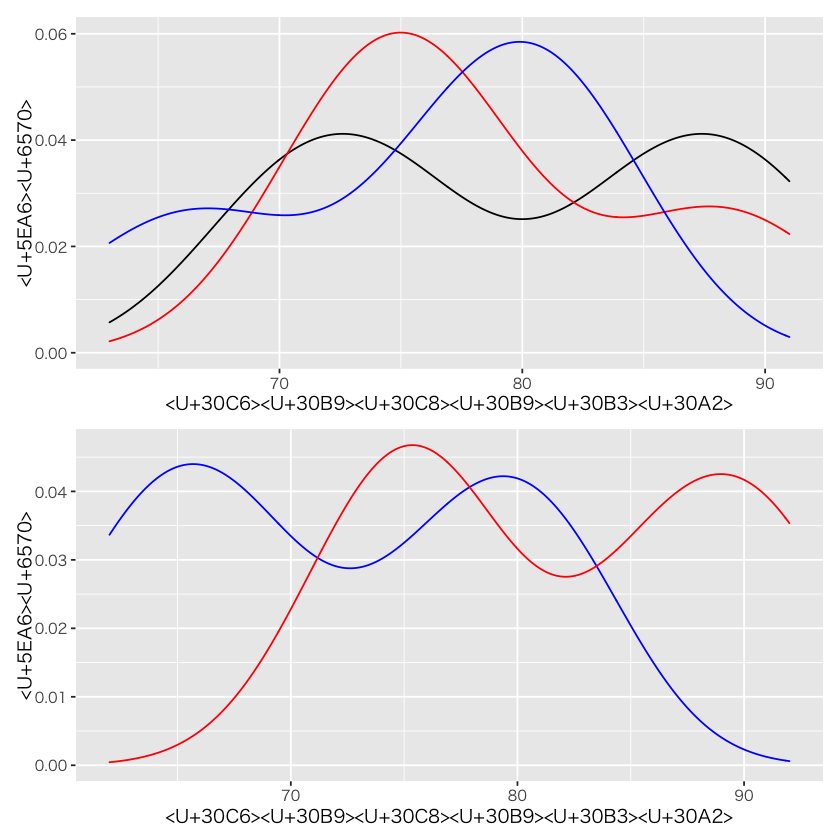

In [72]:
library("tidyverse")
data03 <- read_csv("./causality-main/data03.csv")


library(ggplot2)

y1Naive <- data03$y3[data03$t1==1]
y0Naive <- data03$y3[data03$t1==0]


g1 <- ggplot() +
geom_density(data=data03, mapping=aes(x1), color="black") +
geom_density(mapping=aes(y1Naive), color='red') +
geom_density(mapping=aes(y0Naive), color='blue') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme_gray(base_family=my_font)


g2 <- data03 %>%
ggplot() +
geom_density(mapping=aes(y0t), color="blue") +
geom_density(mapping=aes(y1t), color='red') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme_gray(base_family=my_font)

library(patchwork)
g1 + g2 +
  plot_layout(guides = 'collect', ncol=1)

<font color="red">**結局うまくいかない**</font>

PostScriptFontsのエラー方面で色々探してみる

In [73]:
postscriptFonts()$Japan1$family

[1] "HeiseiKakuGo-W5"

どうやらpostscriptFontsにはHiraginoが登録されていないっぽい

In [52]:
##### WHAT THE FUCK#####

登録されているっぽいJapan1の'HeiseiKakuGo-W5'でやってみる

In [84]:
library("tidyverse")
data03 <- read_csv("./causality-main/data03.csv")


library(ggplot2)

y1Naive <- data03$y3[data03$t1==1]
y0Naive <- data03$y3[data03$t1==0]

g1 <- ggplot() +
geom_density(data=data03, mapping=aes(x1), color="black") +
geom_density(mapping=aes(y1Naive), color='red') +
geom_density(mapping=aes(y0Naive), color='blue') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme_bw(base_family=postscriptFonts()$Japan1$family)



g2 <- data03 %>%
ggplot() +
geom_density(mapping=aes(y0t), color="blue") +
geom_density(mapping=aes(y1t), color='red') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme_bw(base_family=postscriptFonts()$Japan1$family)

library(patchwork)
g1 + g2 +
  plot_layout(guides = 'collect', ncol=1)

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'HeiseiKakuGo-W5' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'HeiseiKakuGo-W5' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'HeiseiKakuGo-W5' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'HeiseiKakuGo-W5' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fam

ERROR: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title

> "font family 'HeiseiKakuGo-W5' not found in PostScript font database"

とか出やがる上に

>Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found
Traceback:
plot without title

とか抜かしやがる

一旦[ここ](https://qiita.com/kota9/items/60b55b85ba327788751e)を参考にやってみる

In [81]:
library("tidyverse")
data03 <- read_csv("./causality-main/data03.csv")


library(ggplot2)

y1Naive <- data03$y3[data03$t1==1]
y0Naive <- data03$y3[data03$t1==0]

g1 <- ggplot() +
geom_density(data=data03, mapping=aes(x1), color="black") +
geom_density(mapping=aes(y1Naive), color='red') +
geom_density(mapping=aes(y0Naive), color='blue') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme(text=element_text(family="Japan1"))



g2 <- data03 %>%
ggplot() +
geom_density(mapping=aes(y0t), color="blue") +
geom_density(mapping=aes(y1t), color='red') +
labs(title=waiver(), x="テストスコア", y="度数") +
theme(text=element_text(family="Japan1"))

library(patchwork)
g1 + g2 +
  plot_layout(guides = 'collect', ncol=1)

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title

> ggplot2 : polygon edge not found

これが出てくる。まじで辛い。

postscriptfontsで登録されているはずのfontで試してもダメ<br>
-->全人類英語で暮らそう。<br>

In [85]:
print("That's life. Let's just fuck it up")

[1] "That's life. Let's just fuck it up"


So, just try plotting a graph with freaking English texts.

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


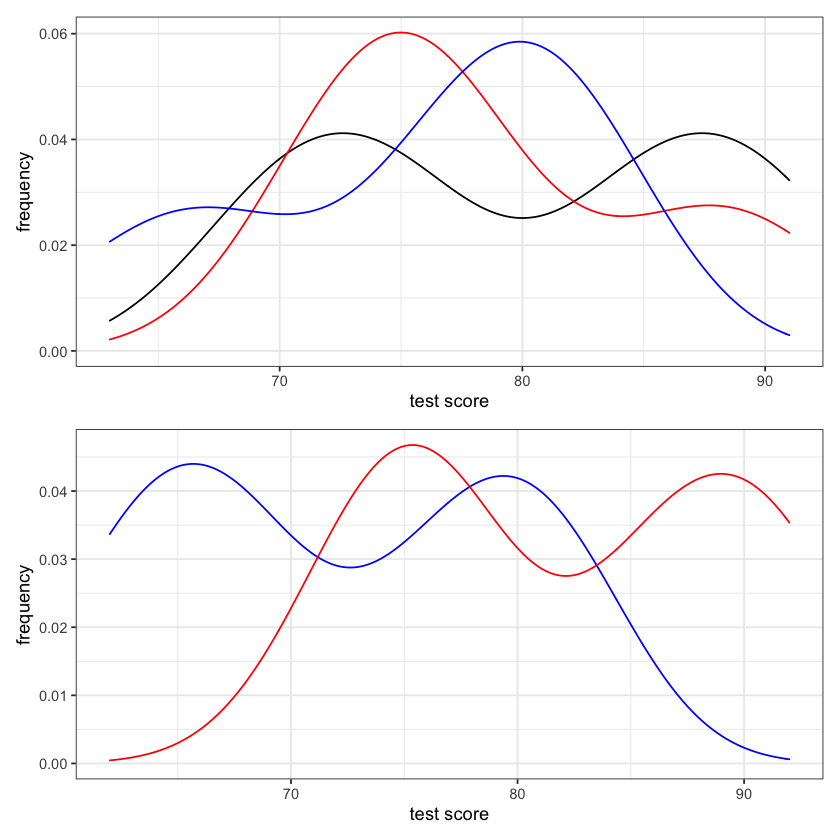

In [86]:
library("tidyverse")
data03 <- read_csv("./causality-main/data03.csv")


library(ggplot2)

y1Naive <- data03$y3[data03$t1==1]
y0Naive <- data03$y3[data03$t1==0]

g1 <- ggplot() +
geom_density(data=data03, mapping=aes(x1), color="black") +
geom_density(mapping=aes(y1Naive), color='red') +
geom_density(mapping=aes(y0Naive), color='blue') +
labs(title=waiver(), x="test score", y="frequency") +
theme_bw()



g2 <- data03 %>%
ggplot() +
geom_density(mapping=aes(y0t), color="blue") +
geom_density(mapping=aes(y1t), color='red') +
labs(title=waiver(), x="test score", y="frequency") +
theme_bw()

library(patchwork)
g1 + g2 +
  plot_layout(guides = 'collect', ncol=1)

For the future myself, I'll just put the reference [here](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/postscriptFonts.html). Good luck, Cossy.

## Getting back on course

In [93]:
data03 <- read_csv("./causality-main/data03.csv")

data03 %>% with(mean(y3[t1==1]) - mean(y3[t1==0]))
#もしくはsummarize関数を使って以下のコード
data03 %>% summarize(mean(y3[t1==1]) - mean(y3[t1==0]))

data03 %>% with(mean(y1t) - mean(y0t))
#もしくはsummarize関数を使って以下のコード
data03 %>% summarize(mean(y1t) - mean(y0t))

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3.3

mean(y3[t1 == 1]) - mean(y3[t1 == 0])
<dbl>
3.3


[1] 9.8

mean(y1t) - mean(y0t)
<dbl>
9.8


# 3.9

In [96]:
model1 <- lm(y3 ~ x1 + t1, data=data03)
summary(model1)
confint(model1, level=0.95)


Call:
lm(formula = y3 ~ x1 + t1, data = data03)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84950 -0.54042  0.07711  0.38619  1.18781 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.12562    2.27423  -0.935    0.363    
x1           0.93085    0.02704  34.422  < 2e-16 ***
t1           9.81592    0.42757  22.957 3.11e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8573 on 17 degrees of freedom
Multiple R-squared:  0.9867,	Adjusted R-squared:  0.9851 
F-statistic: 629.5 on 2 and 17 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-6.9238192,2.6725754
x1,0.8737921,0.9878995
t1,8.9138219,10.7180189


The following objects are masked from data03 (pos = 3):

    t1, x1, y0t, y1t, y3




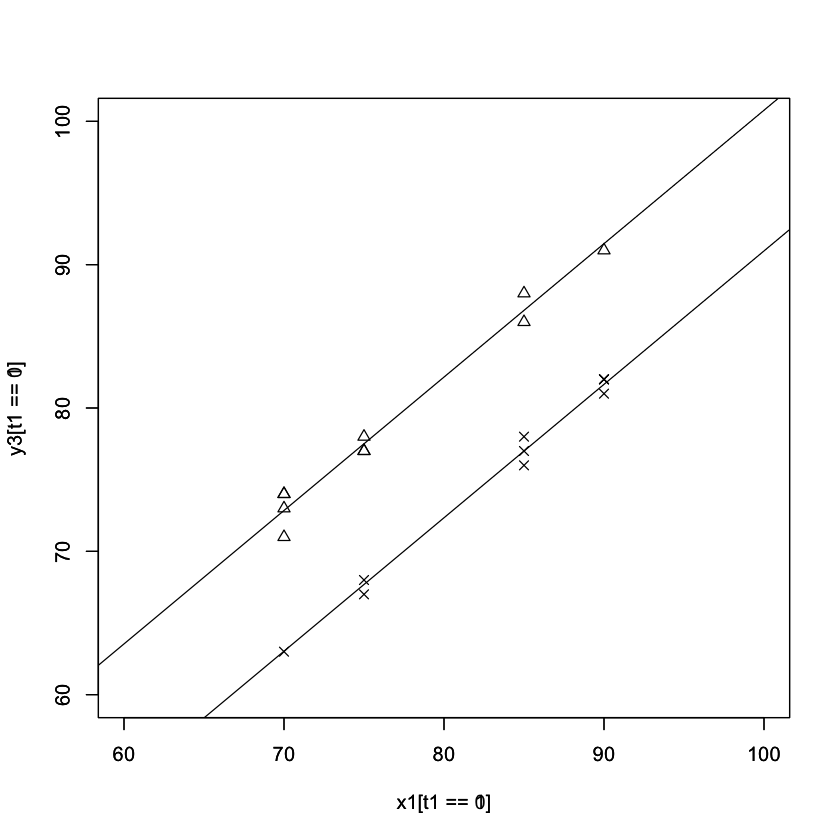

In [101]:
attach(data03)

plot(x1[t1==0], y3[t1==0], xlim=c(60,100), ylim=c(60,100), pch=4)
par(new=TRUE)

plot(x1[t1==1], y3[t1==1], xlim=c(60,100), ylim=c(60,100), pch=2)

b0 <- summary(model1)$coefficients[1]
b1 <- summary(model1)$coefficients[2]
b2 <- summary(model1)$coefficients[3]
abline(a=b0, b=b1)
abline(a=b0+b2, b=b1)

rm(list = ls())


ggplot2でも描いてみる

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (5): x1, y3, t1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
The following objects are masked from data03 (pos = 3):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 4):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 5):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 6):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 7):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 8):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 9):

    t1, x1, y0t, y1t, y3


The following objects are masked from data03 (pos = 10):

    t1, x1, y0t, y1t, y3


The following objects are 

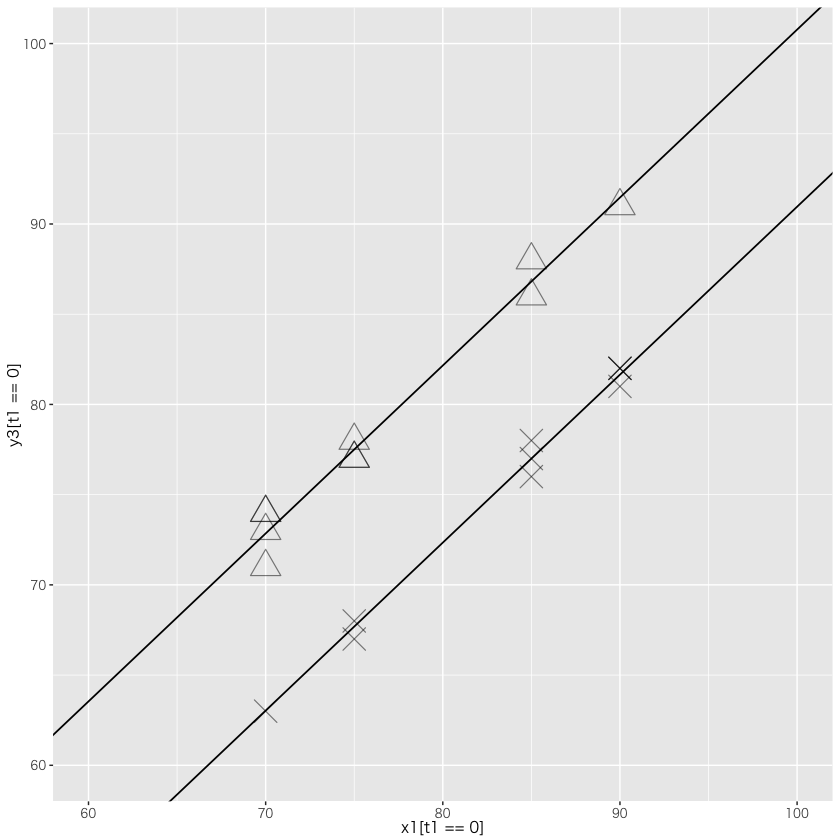

In [140]:
library('tidyverse')
data03 <- read_csv("./causality-main/data03.csv")
model1 <- lm(y3 ~ x1 + t1, data=data03)
b0 <- summary(model1)$coefficients[1]
b1 <- summary(model1)$coefficients[2]
b2 <- summary(model1)$coefficients[3]


attach(data03)
graph3.5 <- ggplot() +
geom_point(aes(x=x1[t1==0], y=y3[t1==0]), shape=4, alpha=0.5, size=6) +
geom_point(aes(x=x1[t1==1], y=y3[t1==1]), shape=2, alpha=0.5, size=6) +
geom_abline(aes(intercept=b0, slope=b1)) +
geom_abline(aes(intercept=b0+b2, slope=b1)) +
xlim(60,100) + 
ylim(60,100)

graph3.5